In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

![work flow](https://images.squarespace-cdn.com/content/v1/55498133e4b0f65d7d6e1c4a/1539895492184-T982116JOKNIGZ7YEVO8/ke17ZwdGBToddI8pDm48kJK4Mm1kch8SFO9ZNkN1NT97gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QHyNOqBUUEtDDsRWrJLTmFk_H6M1tkD9NpL7mXac0oVSXdFfjxR5AjcLwGSebOiGBsFzzcw3xKxvyC_6CFFG_/Data+Science+Workflow.jpg)

![components](https://static.javatpoint.com/tutorial/data-science/images/data-science-components2.png)

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


## 1. Explore data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 1.1. Missing values

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df['CREDIT_LIMIT'].fillna(df.CREDIT_LIMIT.median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df.MINIMUM_PAYMENTS.median(), inplace=True)

In [7]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 1.2. Duplicated values

In [8]:
df.duplicated().sum()

0

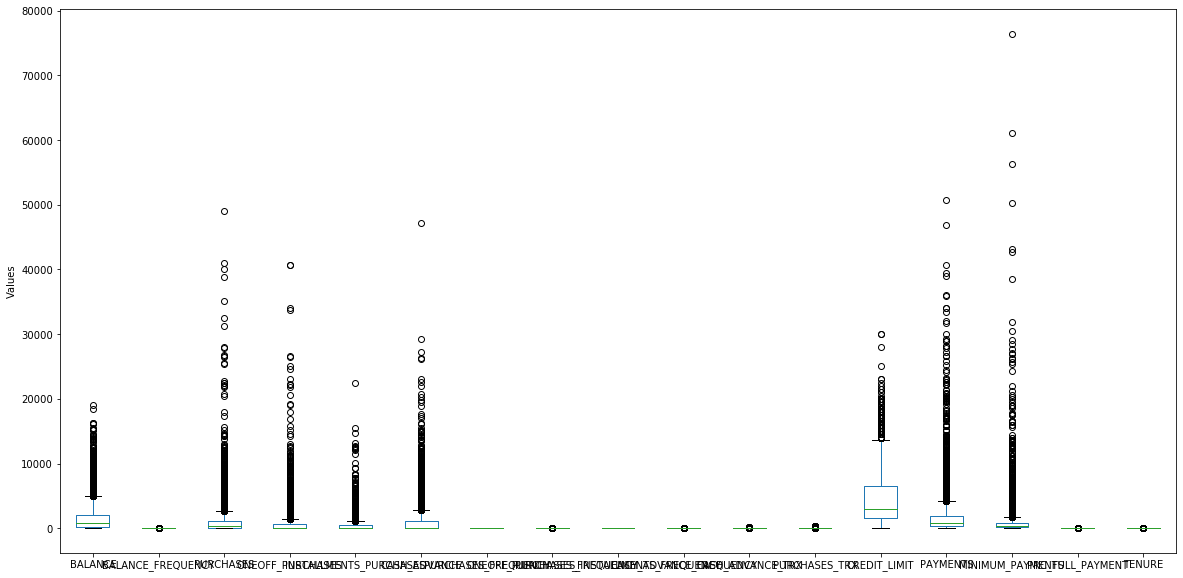

In [9]:
df.plot.box(figsize=(20, 10), xlabel='Attributes', ylabel='Values');

Quartile: 4 khoảng bằng nhau

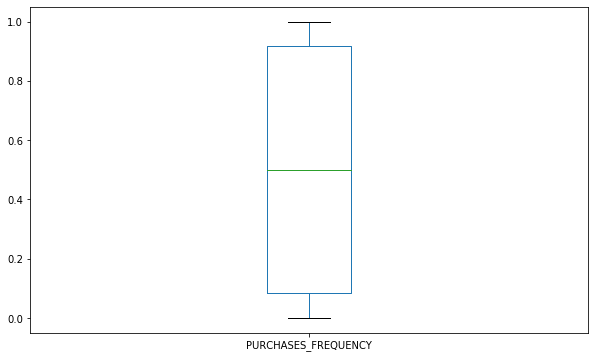

In [10]:
df.PURCHASES_FREQUENCY.plot.box(figsize=(10, 6));

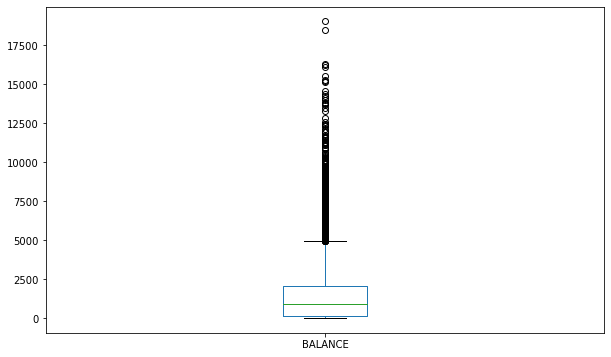

In [11]:
df.BALANCE.plot.box(figsize=(10, 6));

Noise --> Denoise 

## 2. Feature engineering

### Exercise 1

In [12]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [13]:
df['monthly_average_purchase'] = df.PURCHASES / df.TENURE
df['monthly_cash_advance'] = df.eval('CASH_ADVANCE / TENURE')

In [14]:
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_average_purchase,monthly_cash_advance
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,7.95,0.000000
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.00,536.912124


### Exercise 2

In [15]:
df.query('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES > 0')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_average_purchase,monthly_cash_advance
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,268.165833,0.000000
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,178.160833,0.000000
18,C10019,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,13000.0,1720.837373,744.613395,0.000000,12,42.029167,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,C19144,466.723482,0.833333,947.21,498.01,449.20,0.000000,0.833333,0.333333,0.666667,0.000000,0,27,1500.0,38.775803,131.313627,0.000000,6,157.868333,0.000000
8912,C19153,376.547421,0.857143,520.00,280.00,240.00,1178.402416,0.857143,0.142857,0.714286,0.714286,9,7,1000.0,929.415656,103.927887,0.200000,7,74.285714,168.343202
8923,C19164,486.661842,0.833333,1898.88,939.09,959.79,0.000000,0.833333,0.666667,0.666667,0.000000,0,24,1200.0,669.039640,336.880119,0.500000,6,316.480000,0.000000
8927,C19168,91.639086,1.000000,315.20,147.80,167.40,0.000000,1.000000,0.333333,0.833333,0.000000,0,8,1000.0,231.274641,86.344733,0.250000,6,52.533333,0.000000


In [16]:
df.query('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES > 0').shape

(2260, 20)

In [17]:
df.query('ONEOFF_PURCHASES <= 0 & INSTALLMENTS_PURCHASES <= 0').shape

(2042, 20)

In [18]:
df.query('ONEOFF_PURCHASES > 0 & INSTALLMENTS_PURCHASES <= 0').shape

(1874, 20)

In [19]:
def purchase_types(df):
    if (df.ONEOFF_PURCHASES > 0) & (df.INSTALLMENTS_PURCHASES > 0):
        return 'both'
    elif (df.ONEOFF_PURCHASES <= 0) & (df.INSTALLMENTS_PURCHASES > 0):
        return 'installment'
    elif (df.ONEOFF_PURCHASES <= 0) & (df.INSTALLMENTS_PURCHASES <= 0):
        return 'none'
    else:
        return 'oneoff'

In [20]:
df['purchase_type'] = df.apply(purchase_types, axis=1)
#df['purchase_type'] = df.apply(lambda x : purchase_types(x), axis=1)

### Exercise 3

In [21]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'monthly_average_purchase', 'monthly_cash_advance', 'purchase_type'],
      dtype='object')

In [22]:
df['average_amount_per_purchase'] = df.PAYMENTS / df.PURCHASES
df['average_cash_advance_per_purchase'] = df.CASH_ADVANCE / df.PURCHASES

### Exercise 4

In [23]:
df['limit_usage'] = df.eval('BALANCE / CREDIT_LIMIT')

### Exercise 5

In [24]:
df['payment_minimum_payment_ratio'] = df.eval('PAYMENTS / MINIMUM_PAYMENTS')

### Exercise 6

In [25]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'monthly_average_purchase', 'monthly_cash_advance', 'purchase_type',
       'average_amount_per_purchase', 'average_cash_advance_per_purchase',
       'limit_usage', 'payment_minimum_payment_ratio'],
      dtype='object')

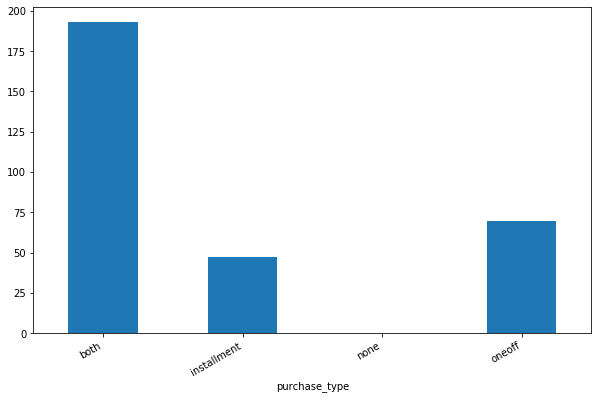

In [26]:
df.groupby('purchase_type').monthly_average_purchase.mean().plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=30, ha='right');

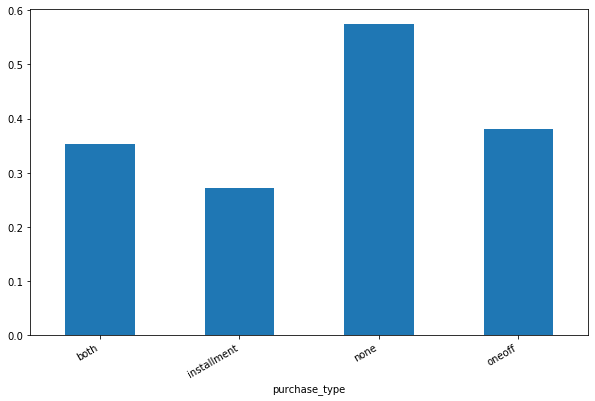

In [27]:
df.groupby('purchase_type').limit_usage.mean().plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=30, ha='right');

## 3. Modeling

### 3.1. Dimensionality Reduction

Curse of dimension
- Vẽ biểu đồ tiện hơn.
- Chắt lọc những thông tin mình cần.
- Thông tin thừa --> nhiễu
- Chạy nhanh hơn 
- Dự báo nhanh hơn, chính xác hơn.

**Principal Component Analysis (PCA)**
- Giữ lại lượng thông tin nhiều nhất có thể --> variance
- Bao nhiêu chiều là đủ?

In [28]:
df['average_amount_per_purchase'] = df.average_amount_per_purchase.replace(np.inf, np.nan).fillna(df.average_amount_per_purchase.replace(np.inf, np.nan).max())
df['average_cash_advance_per_purchase'] = df.average_cash_advance_per_purchase.replace(np.inf, np.nan).fillna(df.average_cash_advance_per_purchase.replace(np.inf, np.nan).max())

### One-hot encoding: convert categorical to nummeric variables

In [36]:
# Should not
df.purchase_type.map({'both': 0, 'installment': 1, 'none': 2, 'oneoff':2})

0       1
1       2
2       2
3       2
4       2
       ..
8945    1
8946    1
8947    1
8948    2
8949    2
Name: purchase_type, Length: 8950, dtype: int64

In [29]:
df_new = pd.concat([df, pd.get_dummies(df.purchase_type)], axis=1)

In [30]:
df_new.drop(columns=['CUST_ID', 'purchase_type'], inplace=True)

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Scaling difference range of values**

In [41]:
scaler = MinMaxScaler()
train_arr = scaler.fit_transform(df_new)

In [43]:
df_train = pd.DataFrame(train_arr, columns=df_new.columns)
df_train.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,monthly_average_purchase,monthly_cash_advance,average_amount_per_purchase,average_cash_advance_per_purchase,limit_usage,payment_minimum_payment_ratio,both,installment,none,oneoff
0,0.002148,0.818182,0.001945,0.0,0.00424,0.000000,0.166667,0.0,0.083333,0.000000,...,0.001945,0.000000,0.000005,0.0,0.002571,0.000211,0.0,1.0,0.0,0.0
1,0.168169,0.909091,0.000000,0.0,0.00000,0.136685,0.000000,0.0,0.000000,0.166667,...,0.000000,0.136685,1.000000,1.0,0.028755,0.000559,0.0,0.0,1.0,0.0


In [44]:
df_train.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,monthly_average_purchase,monthly_cash_advance,average_amount_per_purchase,average_cash_advance_per_purchase,limit_usage,payment_minimum_payment_ratio,both,installment,none,oneoff
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,...,0.021087,0.022652,0.228538,0.228608,0.024443,0.001324,0.309944,0.252514,0.228156,0.209385
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,...,0.044171,0.049168,0.419869,0.419938,0.024495,0.017277,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000832,0.000000,0.000002,0.000000,0.002608,0.000134,0.000000,0.000000,0.000000,0.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,...,0.007815,0.000000,0.000004,0.000000,0.019027,0.000297,0.000000,0.000000,0.000000,0.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,...,0.023792,0.025225,0.000059,0.000035,0.045102,0.000885,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Remove features have high correlation**

word to vectors, word presentation, word embedding

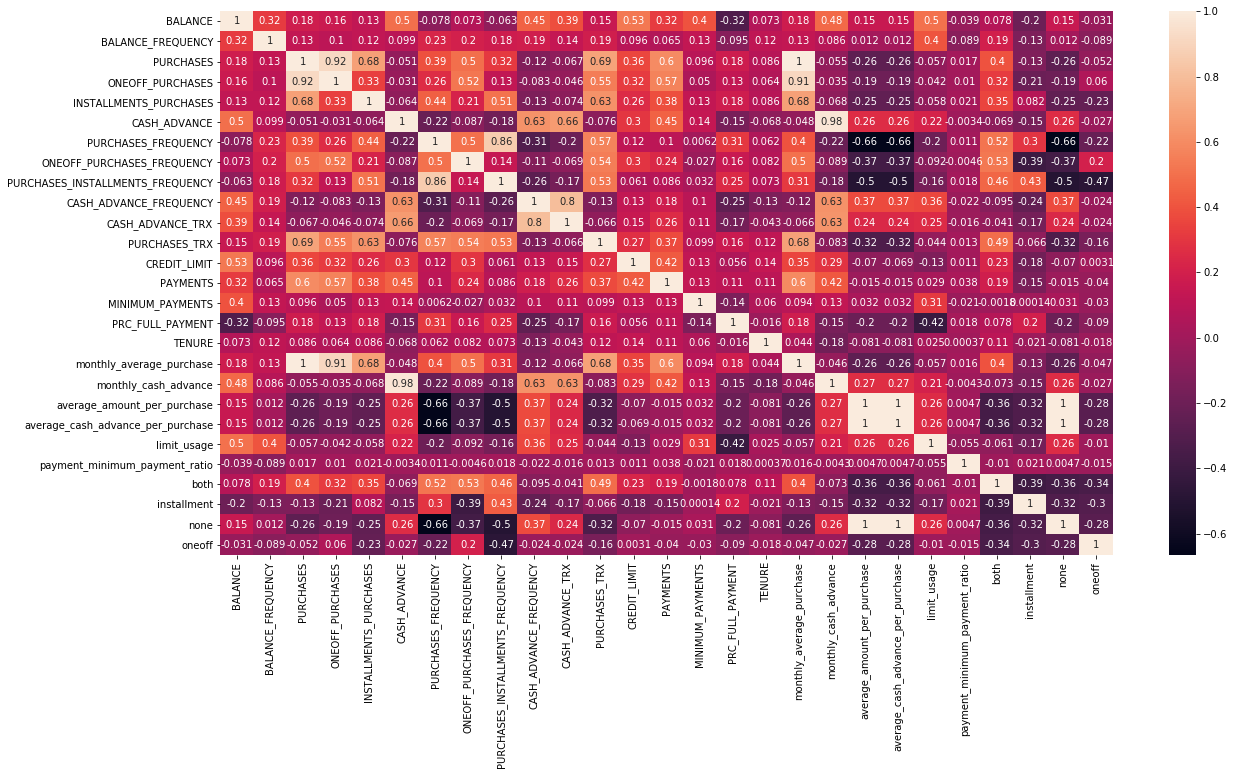

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [162]:
columns = ['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', \
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', \
       'TENURE', 'monthly_average_purchase', 'monthly_cash_advance', 'average_amount_per_purchase', 'limit_usage', \
        'payment_minimum_payment_ratio', 'both', 'installment','none', 'oneoff']
df_train_final = df_train[columns]

In [132]:
df_train_final

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_average_purchase,monthly_cash_advance,average_amount_per_purchase,limit_usage,payment_minimum_payment_ratio
0,0.818182,0.000000,0.083333,0.000000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0.001945,0.000000,5.258812e-06,0.002571,0.000211
1,0.909091,0.000000,0.000000,0.166667,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0.000000,0.136685,1.000000e+00,0.028755,0.000559
2,1.000000,1.000000,0.000000,0.000000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,0.015766,0.000000,2.000195e-06,0.020911,0.000145
3,0.636364,0.083333,0.000000,0.055555,0.002793,0.248748,0.000000,0.004088,0.000000,1.0,0.030567,0.004366,0.000000e+00,0.013968,0.000000
4,1.000000,0.083333,0.000000,0.000000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0.000326,0.000000,1.053985e-04,0.042830,0.000405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,0.000000,0.833333,0.000000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,0.011873,0.000000,2.780452e-06,0.001791,0.000974
8946,1.000000,0.000000,0.833333,0.000000,0.016760,0.031720,0.005439,0.004088,0.000000,0.0,0.012235,0.000000,2.286020e-06,0.001206,0.000129
8947,0.833333,0.000000,0.666667,0.000000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,0.005889,0.000000,1.399193e-06,0.001471,0.000144
8948,0.833333,0.000000,0.000000,0.111111,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,0.000000,0.001551,1.000000e+00,0.001692,0.000138


In [133]:
df_train_final.shape

(8950, 15)

In [134]:
variances = []
for i in range(1, 10):
    pca = PCA(n_components=i)
    pca.fit_transform(df_train_final)
    variances.append(pca.explained_variance_ratio_.sum()*100)

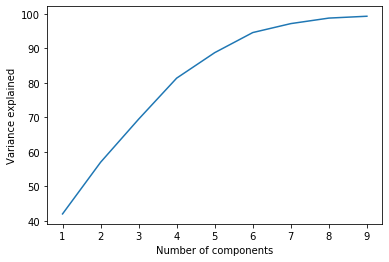

In [135]:
plt.plot(range(1, 10), variances)
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

In [137]:
pd.DataFrame(variances, index=range(1, 10), columns=['variance explained %'])

,variance explained %
1,41.990112
2,56.957958
3,69.441874
4,81.330751
5,88.712232
6,94.534502
7,97.127945
8,98.724175
9,99.259359


### Giảm về 7 chiều

### It depends

In [151]:
pca_7 = PCA(n_components=7)
train_7 = pca_7.fit_transform(df_train_final)

In [152]:
variance_df = pd.DataFrame(pca_7.components_.T, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7'], 
             index=df_train_final.columns)

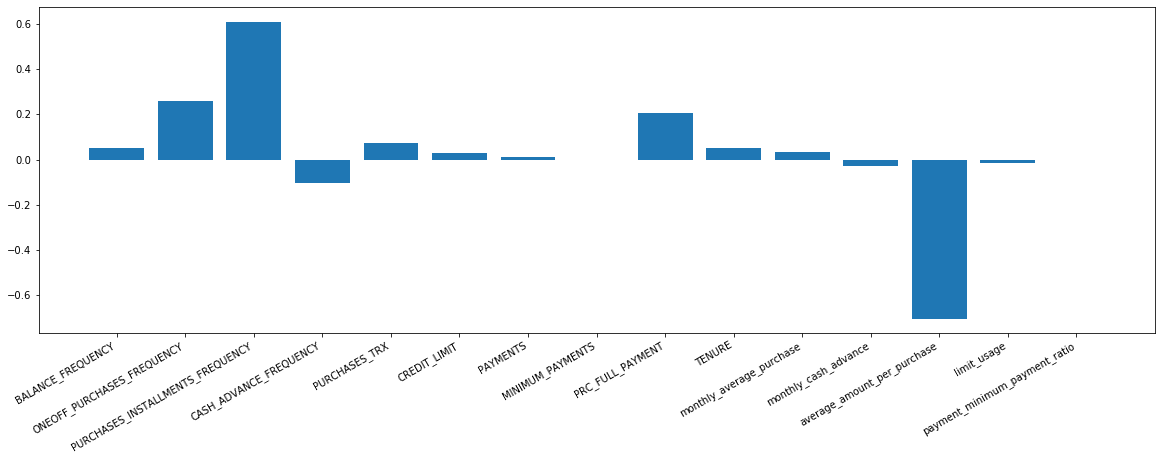

In [153]:
plt.figure(figsize=(20, 6))
plt.bar(x=variance_df.index, height=variance_df.PCA_1)
plt.xticks(rotation=30, ha='right')
plt.show()

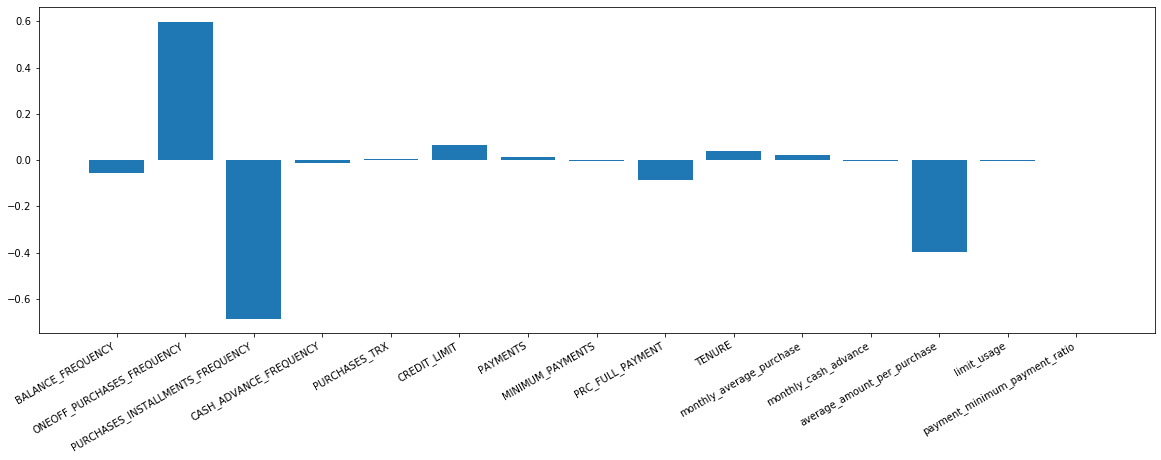

In [186]:
plt.figure(figsize=(20, 6))
plt.bar(x=variance_df.index, height=variance_df.PCA_2)
plt.xticks(rotation=30, ha='right')
plt.show()

### 3.2. Kmean clustering

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score

In [155]:
mean_squared_errors = []
silhouette_scores = []
for cluster in range(2, 10):
    kmean = KMeans(n_clusters=cluster)
    kmean.fit_transform(train_7)
#     mean_squared_errors.append(mean_squared_error(kmean.cluster, kmean.predict(train_7)))
    silhouette_scores.append(silhouette_score(train_7, kmean.predict(train_7)))

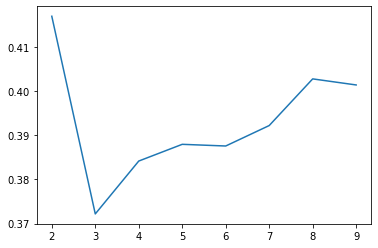

In [156]:
plt.plot(range(2, 10), silhouette_scores)
plt.show()

In [157]:
kmean = KMeans(n_clusters=2)
kmean.fit_transform(train_7)

array([[0.5332885 , 1.03513852],
       [1.15148267, 0.23511168],
       [0.90805706, 1.43790034],
       ...,
       [0.99501263, 1.5211976 ],
       [1.4767838 , 0.92010739],
       [1.16379573, 1.51115978]])

In [158]:
np.unique(kmean.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([6905, 2045]))

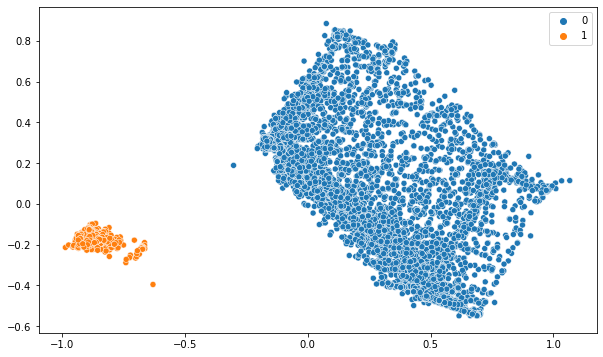

In [159]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_7[:, 0], y=train_7[:, 1], hue=kmean.labels_)
plt.show()

In [126]:
df['custer'] = kmean.labels_

In [127]:
df.query("custer == 1").purchase_type.unique()

array(['both'], dtype=object)

In [128]:
df.query("custer == 0").purchase_type.unique()

array(['oneoff'], dtype=object)

In [129]:
df.query("custer == 2").purchase_type.unique()

array(['installment'], dtype=object)

In [130]:
df.query("custer == 3").purchase_type.unique()

array(['none', 'oneoff', 'installment'], dtype=object)

## 4. Extra: disadvanced

In [163]:
df_train_final.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_average_purchase,monthly_cash_advance,average_amount_per_purchase,limit_usage,payment_minimum_payment_ratio,both,installment,none,oneoff
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,0.202458,0.364437,0.090096,0.041089,0.148390,0.034170,0.011058,0.153715,0.919553,0.021087,0.022652,0.228538,0.024443,0.001324,0.309944,0.252514,0.228156,0.209385
std,0.236904,0.298336,0.397448,0.133414,0.069435,0.121491,0.057078,0.030531,0.292499,0.223055,0.044171,0.049168,0.419869,0.024495,0.017277,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.888889,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002236,0.000000,1.000000,0.000832,0.000000,0.000002,0.002608,0.000134,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.083333,0.166667,0.000000,0.019553,0.098497,0.016894,0.004088,0.000000,1.000000,0.007815,0.000000,0.000004,0.019027,0.000297,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.300000,0.750000,0.148148,0.047486,0.215359,0.037482,0.010322,0.142857,1.000000,0.023792,0.025225,0.000059,0.045102,0.000885,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
df_train_x = pd.concat([df_train_final, pd.get_dummies(np.where(df.CUST_ID.apply(lambda x : x[1:]).astype(int) % 2 == 0, 1, 0))], axis=1)

In [173]:
variances = []
for i in range(1, 10):
    pca = PCA(n_components=i)
    pca.fit_transform(df_train_x)
    variances.append(pca.explained_variance_ratio_.sum()*100)

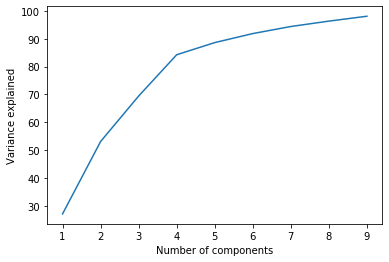

In [174]:
plt.plot(range(1, 10), variances)
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

In [175]:
pd.DataFrame(variances, index=range(1, 10), columns=['variance explained %'])

,variance explained %
1,27.078060
2,53.087233
3,69.418848
4,84.259481
5,88.625551
6,91.865805
7,94.405995
8,96.340622
9,98.093778


In [179]:
pca_7 = PCA(n_components=7)
train_7 = pca_7.fit_transform(df_train_x)

In [180]:
mean_squared_errors = []
silhouette_scores = []
for cluster in range(2, 10):
    kmean = KMeans(n_clusters=cluster)
    kmean.fit_transform(train_7)
#     mean_squared_errors.append(mean_squared_error(kmean.cluster, kmean.predict(train_7)))
    silhouette_scores.append(silhouette_score(train_7, kmean.predict(train_7)))

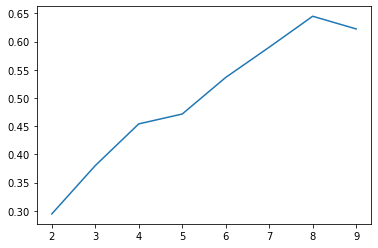

In [181]:
plt.plot(range(2, 10), silhouette_scores)
plt.show()

In [182]:
kmean = KMeans(n_clusters=8)
kmean.fit_transform(train_7)

array([[1.54674228, 1.6867798 , 1.50260993, ..., 0.46866794, 2.20125815,
        1.37023613],
       [2.3715639 , 1.43111826, 1.87010428, ..., 2.33530569, 0.2012446 ,
        2.26597849],
       [1.58263859, 1.95780306, 2.31352017, ..., 1.82063279, 2.41305263,
        0.47222905],
       ...,
       [2.26403885, 2.49872067, 0.89632698, ..., 1.67793925, 2.07723435,
        2.31603841],
       [2.13158525, 0.88314762, 2.5014479 , ..., 2.05519036, 1.68774829,
        1.98228385],
       [2.32590556, 2.48029081, 1.93982178, ..., 2.39223662, 2.05477711,
        1.69875942]])

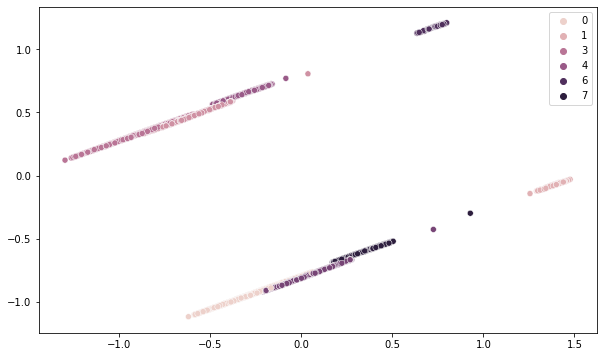

In [183]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_7[:, 0], y=train_7[:, 1], hue=kmean.labels_)
plt.show()

### Conclusion
- Feature engineering: waste time, 80% time
- Machine learning: not magic, based on math
- Need a lot of domain
- Trial and error